**Python solutions to Gary Koop's "Analysis of Economic Data" (4th ed., 2013)**

**Chapter 6: Multiple Regression**

Jakub Janus, [jakub.janus@uek.krakow.pl](jakub.janus@uek.krakow.pl)

# Exercise 6.1
(a) Create XY-plots using the four explanatory variables in the house pricing
example one at a time (i.e. plot Y and X1, then plot Y and X2 and so on).


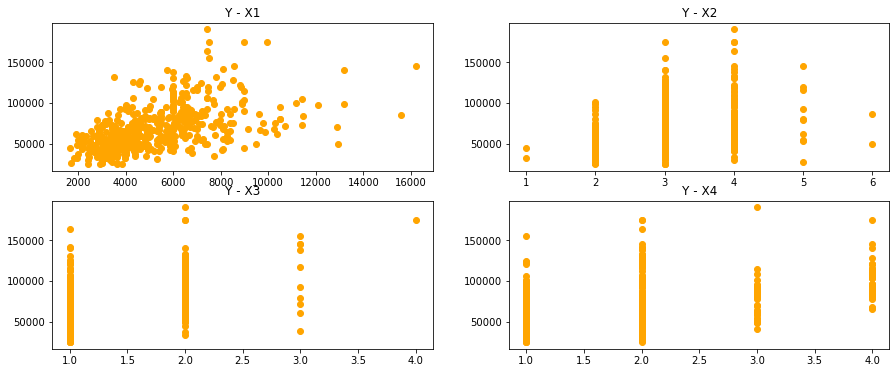

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
hprice = pd.read_excel(r'datasets\HPRICE.xls')
# Re-name variables
hprice = hprice.rename(columns = {'sale price': 'Y', 'lot size': 'X1', '#bedroom': 'X2', '#bath': 'X3', '#stories': 'X4'})
# Plot
fig, axs = plt.subplots(2, 2, figsize = (15, 6))
axs[0, 0].scatter(hprice['X1'], hprice['Y'], c = 'orange')
axs[0, 0].set_title('Y - X1')
axs[0, 1].scatter(hprice['X2'], hprice['Y'], c = 'orange')
axs[0, 1].set_title('Y - X2')
axs[1, 0].scatter(hprice['X3'], hprice['Y'], c = 'orange')
axs[1, 0].set_title('Y - X3')
axs[1, 1].scatter(hprice['X4'], hprice['Y'], c = 'orange')
axs[1, 1].set_title('Y - X4')
plt.show()

(b) Perform simple regressions using the explanatory variables one at a time (i.e.
regress Y on X1, then regress Y on X2 and so on).


In [2]:
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
# Regression Y on X1
formula_Y_X1 = sm.OLS(hprice['Y'], sm.add_constant(hprice['X1']))
reg_Y_X1 = formula_Y_X1.fit()
# Regression Y on X2
formula_Y_X2 = sm.OLS(hprice['Y'], sm.add_constant(hprice['X2']))
reg_Y_X2 = formula_Y_X2.fit()
# Regression Y on X3
formula_Y_X3 = sm.OLS(hprice['Y'], sm.add_constant(hprice['X3']))
reg_Y_X3 = formula_Y_X3.fit()
# Regression Y on X4
formula_Y_X4 = sm.OLS(hprice['Y'], sm.add_constant(hprice['X4']))
reg_Y_X4 = formula_Y_X4.fit()
# Comparison
stargazer_hprice_comp = Stargazer([reg_Y_X1, reg_Y_X2, reg_Y_X3, reg_Y_X4])
HTML(stargazer_hprice_comp.render_html())

# Exercise 6.2
Using data set HPRICE.XLS, let house price be the dependent variable (Y) and
consider the following potential explanatory variables:
* X1 = the lot size of the property (in square feet)
* X2 = the number of bedrooms
* X3 = the number of bathrooms
* X4 = the number of storeys (excluding the basement).

(a) Regress Y on X1, X2, X3 and X4 (i.e. recreate Table 6.1) and discuss your
results.

In [3]:
X_all = hprice[['X1', 'X2', 'X3', 'X4']]
formula_Y_X_all = sm.OLS(hprice['Y'], sm.add_constant(X_all))
reg_Y_X_all = formula_Y_X_all.fit()
reg_Y_X_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     156.0
Date:                Mon, 01 Mar 2021   Prob (F-statistic):           1.18e-88
Time:                        19:51:55   Log-Likelihood:                -6130.0
No. Observations:                 546   AIC:                         1.227e+04
Df Residuals:                     541   BIC:                         1.229e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4009.5500   3603.109     -1.113      0.266   -1.11e+04    3068.248
X1             5.4292      0.369     14.703      0.000       4.704       6.155
X2          2824.6138   1214.808      2.325      0.020     438.296    5210.932
X3          1.711e+04   1734.434      9.862      0.000    1.37e+04    2.05e+04
X4          7634.8970   1007.974      7.574      0.000    5654.874    9614.920
==============================================================================
Omnibus:                       94.915   Durbin-Watson:                   1.483
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.320
Skew:                           0.893   Prob(JB):                     3.57e-51
Kurtosis:                       5.650   Cond. No.                     2.64e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(b) Regress Y on various subsets of X1, X2, X3 and X4 and discuss your results.

In [4]:
#Subset 1
X_s1 = hprice[['X1', 'X2']]
formula_Y_X_s1 = sm.OLS(hprice['Y'], sm.add_constant(X_s1))
reg_Y_X_s1 = formula_Y_X_s1.fit()
#Subset 2
X_s2 = hprice[['X3', 'X4']]
formula_Y_X_s2 = sm.OLS(hprice['Y'], sm.add_constant(X_s2))
reg_Y_X_s2 = formula_Y_X_s2.fit()
#Subset 3
X_s3 = hprice[['X1', 'X4']]
formula_Y_X_s3 = sm.OLS(hprice['Y'], sm.add_constant(X_s3))
reg_Y_X_s3 = formula_Y_X_s3.fit()
#Subset 3
X_s4 = hprice[['X2', 'X3']]
formula_Y_X_s4 = sm.OLS(hprice['Y'], sm.add_constant(X_s4))
reg_Y_X_s4 = formula_Y_X_s4.fit()
# Comparison
stargazer_hprice_subsets = Stargazer([reg_Y_X_s1, reg_Y_X_s2, reg_Y_X_s3, reg_Y_X_s4])
HTML(stargazer_hprice_subsets.render_html())

Additional code: all possible combination of regressors

In [5]:
# Name all dependent variable
X_all_names = {'X1', 'X2', 'X3', 'X4'}
# Define powerset
from itertools import chain, combinations
def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s) + 1))
combinations = list(powerset(X_all_names))
# Loop for regressions
all_regs = []
for i in range(len(combinations)):
    x_s = combinations[i]
    x_s = [x[0:2] for x in x_s] # names of variables
    X_s = X_all[x_s] # variable
    formula_Y_X_s = sm.OLS(hprice['Y'], sm.add_constant(X_s))
    reg_Y_X_s = formula_Y_X_s.fit()
    all_regs.append(reg_Y_X_s)
# Comparte all regression
stargazer_X_all_subsets = Stargazer(all_regs)
HTML(stargazer_X_all_subsets.render_html())

# Exercise 6.3
Use data set FOREST.XLS with deforestation (Y), population density (X1), %
change in cropland (X2) and % change in pasture land (X3). Carry out a multiple
regression analysis of this data set addressing the issues raised in this chapter. For
instance, you may want to:

(a) Regress Y on X1, X2 and X3 and verbally interpret the coefficient estimates
you obtain.

In [6]:
forest = pd.read_excel(r'datasets\FOREST.xls')
# Re-name variables
forest = forest.rename(columns = {'Forest loss': 'Y', 'Pop dens': 'X1', 'Crop ch': 'X2', 'Pasture ch': 'X3'})
forest_X_all = forest[['X1', 'X2', 'X3']] 
formula_forest_Y_X_all = sm.OLS(forest['Y'], sm.add_constant(forest_X_all))
reg_forest_Y_X_all = formula_forest_Y_X_all.fit()
reg_forest_Y_X_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     21.59
Date:                Mon, 01 Mar 2021   Prob (F-statistic):           7.45e-10
Time:                        19:51:55   Log-Likelihood:                -69.677
No. Observations:                  70   AIC:                             147.4
Df Residuals:                      66   BIC:                             156.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5657      0.133      4.262      0.000       0.301       0.831
X1             0.0008      0.000      7.113      0.000       0.001       0.001
X2            -0.0040      0.010     -0.389      0.698      -0.024       0.016
X3             0.0280      0.010      2.796      0.007       0.008       0.048
==============================================================================
Omnibus:                       34.883   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.376
Skew:                           1.405   Prob(JB):                     9.82e-28
Kurtosis:                       8.895   Cond. No.                     1.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(b) Discuss the statistical significance of the coefficients. Are there explanatory
variables that can be dropped?

In [7]:
reg_forest_Y_X_all.conf_int().iloc[2:3]

,0,1
X2,-0.024368,0.016418


(c) Discuss the fit of the regression.

In [8]:
reg_forest_Y_X_all.rsquared_adj

0.472301913602836

(d) Calculate a correlation matrix. Through consideration of it and the regression
results, discuss the issue of multicollinearity.

In [9]:
forest_X_all.corr()

,X1,X2,X3
X1,1.000000,-0.126898,0.088625
X2,-0.126898,1.000000,0.248937
X3,0.088625,0.248937,1.000000
